In [3]:
# Load the electric vehicle dataset and required Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

df = pd.read_excel("FEV-data-Excel.xlsx")

print(df.head())

ModuleNotFoundError: No module named 'pandas'

In [2]:
# Task 1: Filter EVs under 350,000 PLN with at least 400 km range,
# group the filtered EVs by manufacturer (Make), and calculate
# the average battery capacity per manufacturer.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

df = pd.read_excel("FEV-data-Excel.xlsx")

filtered_df = df[(df["Minimal price (gross) [PLN]"] <= 350000) & (df["Range (WLTP) [km]"] >= 400)]
print("Filtered EVs:\n", filtered_df[["Car full name", "Make", "Minimal price (gross) [PLN]", "Range (WLTP) [km]"]])

grouped_by_make = filtered_df.groupby("Make")
print("\nGrouped by Manufacturer:\n", grouped_by_make.size())

avg_battery_by_make = grouped_by_make["Battery capacity [kWh]"].mean().reset_index()
print("\nAverage Battery Capacity per Make:\n", avg_battery_by_make)

ModuleNotFoundError: No module named 'pandas'

In [16]:
# Task 2: Detect outlier vehicles based on their mean energy consumption
# using the Interquartile Range (IQR) method.
import pandas as pd

df = pd.read_excel("FEV-data-Excel.xlsx")

Q1 = df["mean - Energy consumption [kWh/100 km]"].quantile(0.25)
Q3 = df["mean - Energy consumption [kWh/100 km]"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["mean - Energy consumption [kWh/100 km]"] < lower_bound) |
              (df["mean - Energy consumption [kWh/100 km]"] > upper_bound)]

print("Outliers in Energy Consumption:\n", outliers[["Car full name", "mean - Energy consumption [kWh/100 km]"]])

Outliers in Energy Consumption:
 Empty DataFrame
Columns: [Car full name, mean - Energy consumption [kWh/100 km]]
Index: []


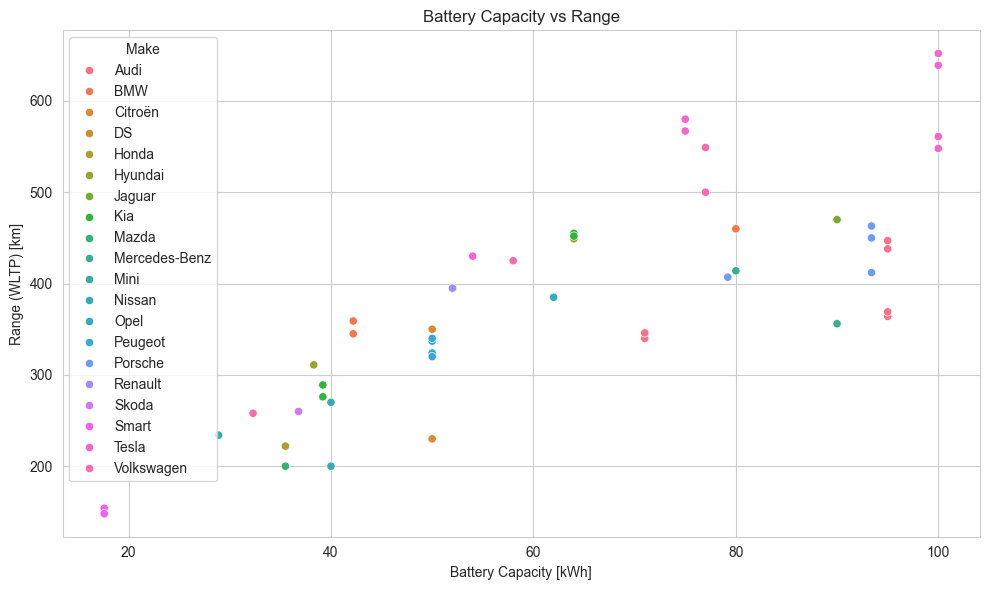

In [17]:
# Task 3: Visualize the relationship between battery capacity and vehicle range
# using a scatter plot with manufacturer-based coloring.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("FEV-data-Excel.xlsx")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Battery capacity [kWh]", y="Range (WLTP) [km]", hue="Make")
plt.title("Battery Capacity vs Range")
plt.xlabel("Battery Capacity [kWh]")
plt.ylabel("Range (WLTP) [km]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Task 4: Build a recommendation system class that filters the top 3 EVs
# based on user's budget, minimum range, and battery capacity.

import pandas as pd

df = pd.read_excel("FEV-data-Excel.xlsx")

class EVRecommender:
    def __init__(self, data):
        self.data = data

    def recommend(self, budget, min_range, min_battery):
        filtered = self.data[
            (self.data["Minimal price (gross) [PLN]"] <= budget) &
            (self.data["Range (WLTP) [km]"] >= min_range) &
            (self.data["Battery capacity [kWh]"] >= min_battery)
        ]
        top = filtered.sort_values(by="Range (WLTP) [km]", ascending=False).head(3)
        return top[["Car full name", "Make", "Minimal price (gross) [PLN]", "Range (WLTP) [km]", "Battery capacity [kWh]"]]

recommender = EVRecommender(df)
top3 = recommender.recommend(budget=330000, min_range=350, min_battery=60)
print("Top 3 Recommended EVs:\n", top3)

Top 3 Recommended EVs:
                 Car full name        Make  Minimal price (gross) [PLN]  \
40   Tesla Model 3 Long Range       Tesla                       235490   
41  Tesla Model 3 Performance       Tesla                       260490   
48      Volkswagen ID.3 Pro S  Volkswagen                       179990   

    Range (WLTP) [km]  Battery capacity [kWh]  
40                580                    75.0  
41                567                    75.0  
48                549                    77.0  


In [19]:
# Task 5: Perform a two-sample t-test to determine whether the average
# engine power of Tesla and Audi vehicles differ significantly.

import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_excel("FEV-data-Excel.xlsx")

tesla = df[df["Make"].str.lower() == "tesla"]["Engine power [KM]"]
audi = df[df["Make"].str.lower() == "audi"]["Engine power [KM]"]

t_stat, p_value = ttest_ind(tesla, audi, equal_var=False)

print("Tesla Engine Power:\n", tesla.describe())
print("\nAudi Engine Power:\n", audi.describe())
print("\nT-statistic:", t_stat)
print("P-value:", p_value)

Tesla Engine Power:
 count      7.000000
mean     533.000000
std      184.663658
min      285.000000
25%      426.000000
50%      525.000000
75%      648.500000
max      772.000000
Name: Engine power [KM], dtype: float64

Audi Engine Power:
 count      6.000000
mean     392.000000
std       88.512146
min      313.000000
25%      324.750000
50%      360.000000
75%      467.250000
max      503.000000
Name: Engine power [KM], dtype: float64

T-statistic: 1.7939951827297178
P-value: 0.10684105068839565


Google Drive Link to Project Video Explanation - https://drive.google.com/drive/folders/14Ch77-29g_9UH9fMBHQ7kSa7JzV-h1ob?usp=sharing

By, Utkarsh Anand